In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('police.csv')
df

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...,...
23505,23506,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,23507,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,23508,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,23509,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


The ID Reference Number column likely serves as a unique identifier for each arrest record.

The Subject's race, Subject's gender, Subject's age, and Ethnicity columns provide demographic information about the individuals who were arrested.

The District of occurrence column likely indicates the district in which the arrest took place.

The Adjacent to School column is particularly interesting. It appears to indicate whether the arrest took place within 500 feet of a school, with a 1 indicating that it did and a 0 indicating that it did not. This could be useful for analyzing patterns in where arrests occur.

The Assigned Division and Assigned Bureau columns likely indicate the division and bureau of the police department that were assigned to the arrest.

Finally, the Event Date/Time column provides the date and time of the arrest. This could be useful for analyzing patterns in when arrests occur.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [5]:
df.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School
count,23510.00000,23510.000000,23408.000000,23510.000000
mean,11755.50000,31.813143,3.989192,0.085155
std,6786.89675,12.946909,1.748587,0.279119
min,1.00000,1.000000,1.000000,0.000000
25%,5878.25000,22.000000,3.000000,0.000000
50%,11755.50000,30.000000,4.000000,0.000000
75%,17632.75000,39.000000,5.000000,0.000000
max,23510.00000,99.000000,8.000000,1.000000


In [6]:
df.isna().sum()

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

In [7]:
#dont need refrence ID
df = df.drop(df.columns[0], axis = 1)

In [8]:
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [9]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

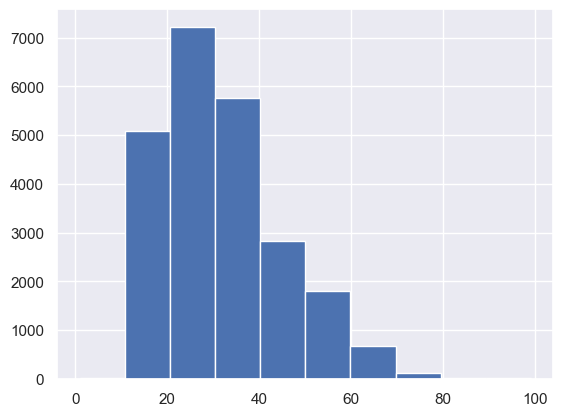

In [10]:
plt.hist(df['Subject\'s age'])
plt.show()

In [11]:
df = df[(df['Subject\'s age'] >= 10) & (df['Subject\'s age'] <= 80)]
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


filter age between 10 and 80 to eliminate outliers

In [12]:
df['Subject\'s race'].value_counts()

Subject's race
Black/African American       11492
White                        11246
Asian                          630
Unknown                         71
American Indian/ALSK Natv       35
Hawaiian/Pacific Islander       20
Name: count, dtype: int64

In [13]:
df = df[df['Subject\'s race'] != 'Unknown']
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [14]:
df['Assigned Division'].value_counts(dropna = False)

Assigned Division
3D      4317
4D      3891
5D      3489
GPD     2391
2D      1866
6D      1763
RCPD    1277
TOD     1024
1D       921
TPPD     782
IMTD     463
CED      360
SID      253
SVID     247
NaN      129
MCD       75
CID       74
MCFM      49
MCSO      19
PSTA      17
SOD        7
FSB        4
ISB        3
PSCC       1
PERS       1
Name: count, dtype: int64

In [15]:
df = df.dropna(subset = ['Assigned Division'])
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [16]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division            0
Assigned Bureau           4512
Event Date/Time              0
dtype: int64

In [17]:

df = df[df['District of occurrence'] != 8.0]

In [18]:
df[df["Assigned Bureau"].isna()]["Assigned Division"].value_counts()

Assigned Division
GPD     2391
RCPD    1277
MCFM      49
TPPD      15
MCSO      13
Name: count, dtype: int64

In [19]:
#impute district based on other division
#if assigned division is 1d or RCPD and district of occurenece is null fill in 1

def fill_district(division, district):
  if pd.isnull(district) and division in division_district_map:
    return division_district_map.get(division)
  else:
    return district

division_district_map = {'3D': 3.0, '2D': 2.0, '4D': 4.0, 'GPD': 6.0, '5D': 5.0, 'TPPD': 8.0, '6D': 6.0, 'RCPD': 1.0, '1D': 1.0}

df['District of occurrence'] = df.apply(lambda row: fill_district(row['Assigned Division'], row['District of occurrence']), axis=1)

/var/folders/z9/z86qry_94853pn_mr38st7n80000gn/T/ipykernel_46802/1035568838.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District of occurrence'] = df.apply(lambda row: fill_district(row['Assigned Division'], row['District of occurrence']), axis=1)


In [20]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3745
Event Date/Time              0
dtype: int64

In [21]:
df1 = df.copy()

In [22]:
df1.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3745
Event Date/Time              0
dtype: int64

In [23]:
#impute Bureau based on Division
#We know that MCFM belongs to ISB and MCSO belongs to PSB

df['Assigned Bureau'] = df.apply(lambda row: 'ISB' if row['Assigned Division'] == 'MCFM' 
                                 else ('PSB' if row['Assigned Division'] == 'MCSO' else row['Assigned Bureau']), axis=1)

/var/folders/z9/z86qry_94853pn_mr38st7n80000gn/T/ipykernel_46802/3490352568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Assigned Bureau'] = df.apply(lambda row: 'ISB' if row['Assigned Division'] == 'MCFM'


In [24]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3683
Event Date/Time              0
dtype: int64

In [25]:
df_pd = df[df['Assigned Bureau'].isnull()]
df_pd['Assigned Division'].value_counts()

Assigned Division
GPD     2391
RCPD    1277
TPPD      15
Name: count, dtype: int64

In [26]:
df_pd = df_pd.drop('Assigned Bureau', axis=1) 

In [27]:
df_pd.isnull().sum()

Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Event Date/Time           0
dtype: int64

In [28]:
df = df[df['Assigned Division'].str[-2:] != 'PD']
df['Assigned Division'].unique()

array(['TOD', '4D', '3D', '5D', '6D', 'IMTD', '2D', '1D', 'SVID', 'CID',
       'MCFM', 'SID', 'PSTA', 'MCSO', 'MCD', 'SOD', 'CED', 'PSCC', 'FSB',
       'PERS', 'ISB'], dtype=object)

In [29]:
df.isnull().sum()

Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Assigned Bureau           0
Event Date/Time           0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18826 entries, 0 to 23509
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Subject's race          18826 non-null  object 
 1   Subject's gender        18826 non-null  object 
 2   Subject's age           18826 non-null  int64  
 3   Ethnicity               18826 non-null  object 
 4   District of occurrence  18826 non-null  float64
 5   Adjacent to School      18826 non-null  int64  
 6   Assigned Division       18826 non-null  object 
 7   Assigned Bureau         18826 non-null  object 
 8   Event Date/Time         18826 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ MB


In [31]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3683 entries, 1 to 23502
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Subject's race          3683 non-null   object 
 1   Subject's gender        3683 non-null   object 
 2   Subject's age           3683 non-null   int64  
 3   Ethnicity               3683 non-null   object 
 4   District of occurrence  3683 non-null   float64
 5   Adjacent to School      3683 non-null   int64  
 6   Assigned Division       3683 non-null   object 
 7   Event Date/Time         3683 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 259.0+ KB


In [32]:
df_pd["Event Date/Time"] = pd.to_datetime(df_pd["Event Date/Time"])

In [33]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3683 entries, 1 to 23502
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          3683 non-null   object        
 1   Subject's gender        3683 non-null   object        
 2   Subject's age           3683 non-null   int64         
 3   Ethnicity               3683 non-null   object        
 4   District of occurrence  3683 non-null   float64       
 5   Adjacent to School      3683 non-null   int64         
 6   Assigned Division       3683 non-null   object        
 7   Event Date/Time         3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 259.0+ KB


In [34]:
df_pd.head()

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Event Date/Time
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00
5,White,Female,31,HISPANIC,3.0,0,TPPD,2021-01-01 02:47:00
6,White,Male,37,HISPANIC,6.0,0,GPD,2021-01-01 04:49:00


In [35]:
df["Event Date/Time"] = pd.to_datetime(df["Event Date/Time"])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18826 entries, 0 to 23509
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          18826 non-null  object        
 1   Subject's gender        18826 non-null  object        
 2   Subject's age           18826 non-null  int64         
 3   Ethnicity               18826 non-null  object        
 4   District of occurrence  18826 non-null  float64       
 5   Adjacent to School      18826 non-null  int64         
 6   Assigned Division       18826 non-null  object        
 7   Assigned Bureau         18826 non-null  object        
 8   Event Date/Time         18826 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [37]:
df.head()

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00
7,Black/African American,Male,40,NON-HISPANIC,4.0,0,4D,PSB,2021-01-01 06:10:00
8,White,Male,34,HISPANIC,3.0,0,3D,PSB,2021-01-01 08:55:00
9,Black/African American,Male,23,NON-HISPANIC,3.0,0,3D,PSB,2021-01-01 13:54:00


In [38]:
df_pd.to_csv("Police_Department.csv")

In [39]:
df.to_csv("Montgomery_Arrest_Cases.csv")

In [40]:
df.isna().sum()

Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Assigned Bureau           0
Event Date/Time           0
dtype: int64

In [41]:
actual_demographic = pd.DataFrame({
    'Race': ['White', 'African American', 'Asian', 'Native American and Hawaiian'],
    'Count': [457783, 197077, 163507, 7646]
})
actual_demographic

#https://data.census.gov/table/DECENNIALDHC2020.P8?g=050XX00US24031

,Race,Count
0,White,457783
1,African American,197077
2,Asian,163507
3,Native American and Hawaiian,7646


In [42]:
actual_demographic['proportion'] = (actual_demographic['Count'] / np.sum(actual_demographic['Count'])) * 100
actual_demographic = actual_demographic.sort_values(by = 'Race')
actual_demographic

,Race,Count,proportion
1,African American,197077,23.858825
2,Asian,163507,19.794725
3,Native American and Hawaiian,7646,0.925651
0,White,457783,55.420798


In [43]:
df_race = df['Subject\'s race'].copy()
count = df_race.value_counts()
count

Subject's race
Black/African American       9683
White                        8595
Asian                         517
American Indian/ALSK Natv      26
Hawaiian/Pacific Islander       5
Name: count, dtype: int64

In [44]:
df_race = count.reset_index()
df_race.columns = ['race', 'count']
df_race['proportions'] = (df_race['count'] / np.sum(df_race['count'])) * 100
df_race

,race,count,proportions
0,Black/African American,9683,51.434187
1,White,8595,45.654945
2,Asian,517,2.746202
3,American Indian/ALSK Natv,26,0.138107
4,Hawaiian/Pacific Islander,5,0.026559


In [45]:
df_race.loc[3] = df_race.loc[3] + df_race.loc[4]
df_race

,race,count,proportions
0,Black/African American,9683,51.434187
1,White,8595,45.654945
2,Asian,517,2.746202
3,American Indian/ALSK NatvHawaiian/Pacific Isla...,31,0.164666
4,Hawaiian/Pacific Islander,5,0.026559


In [46]:
df_race['race'] = df_race['race'].replace({
    'Black/African American': 'African American',
    'White': 'White',
    'American Indian/ALSK NatvHawaiian/Pacific Islander': 'Native American and Hawaiian',
    'Asian': 'Asian'
})

#'White', 'Black/African-American', 'American Indian', 'Asian', 'Native Hawaiian'

In [47]:
df_race = df_race.sort_values(by = 'race')
df_race = df_race.drop(4)
df_race

,race,count,proportions
0,African American,9683,51.434187
2,Asian,517,2.746202
3,Native American and Hawaiian,31,0.164666
1,White,8595,45.654945


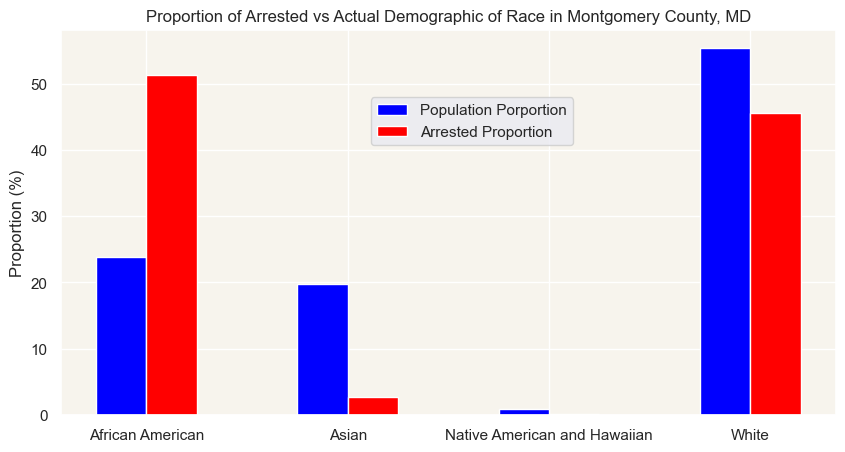

In [48]:
fig, ax = plt.subplots(figsize = (10,5))

w = .25
index = np.arange(len(actual_demographic['Race']))

ax.bar(index - w/2, actual_demographic['proportion'], width = w, label = 'Population Porportion', color = 'blue')##blue
ax.bar(index + w/2, df_race['proportions'], width = w, label = 'Arrested Proportion', color = 'red')
ax.patch.set_facecolor('#f7f4ed')

ax.set_xticks(index)
ax.set_xticklabels(df_race['race'])
ax.set_ylabel('Proportion (%)')
plt.title('Proportion of Arrested vs Actual Demographic of Race in Montgomery County, MD')


plt.legend(loc = (.4,.7))
plt.show()

In [59]:
df_district_population = pd.DataFrame({
    'District': [1, 2, 3, 4, 5, 6],
    'Population': [2352 + 51549 + 7196, 38031 + 107273, 270932 + 110880, 129767 + 50029, 64250 + 21954 + 20178, 187670],
    'Asian': [91 + 444 + 1657, 8674 + 11796, 24647 + 14778, 6314 + 27496, 2739 + 1232 + 17677, 31642],
    'African American': [406 + 127 + 5527, 2352 + 5077, 59955 + 46767, 5847 + 12263, 3855 + 1816 + 14644, 38441],
    'White': [5339 + 23291 + 1793, 22821 + 76481, 103502 + 24910, 30858 + 66472, 10435 + 13050 + 20491, 58340]
})

df_district_population['Others'] = df_district_population['Population'] - (np.sum(df_district_population[['Asian', 'African American', 'White']], axis = 1))

arrest_count = df['District of occurrence'].value_counts()
df_district_population['arrest count'] = df_district_population['District'].map(arrest_count)
#https://data.census.gov/profile/Montgomery_County,_Maryland?g=050XX00US24031#race-and-ethnicity

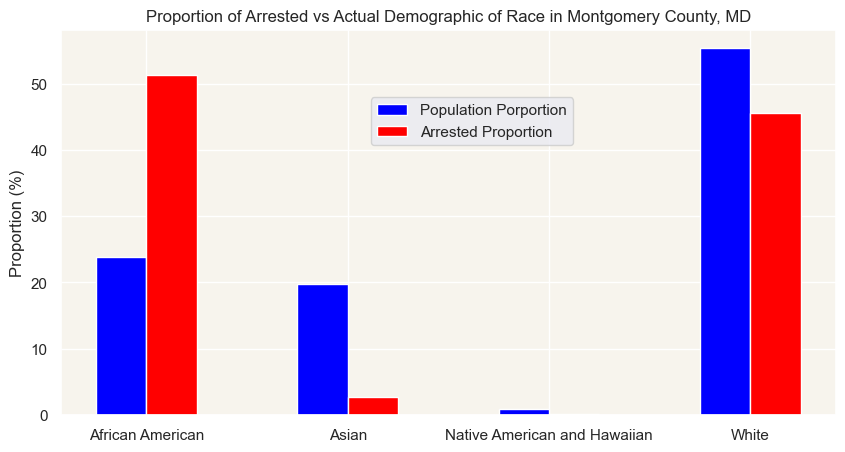

In [50]:
fig, ax = plt.subplots(figsize = (10,5))

w = .25
index = np.arange(len(actual_demographic['Race']))

ax.bar(index - w/2, actual_demographic['proportion'], width = w, label = 'Population Porportion', color = 'blue')##blue
ax.bar(index + w/2, df_race['proportions'], width = w, label = 'Arrested Proportion', color = 'red')
ax.patch.set_facecolor('#f7f4ed')

ax.set_xticks(index)
ax.set_xticklabels(df_race['race'])
ax.set_ylabel('Proportion (%)')
plt.title('Proportion of Arrested vs Actual Demographic of Race in Montgomery County, MD')


plt.legend(loc = (.4,.7))
plt.show()

In [51]:
df.isna().sum()

Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Assigned Bureau           0
Event Date/Time           0
dtype: int64

In [52]:
district_ct = pd.crosstab(df['District of occurrence'], df['Subject\'s race'])
district_ct

Subject's race,American Indian/ALSK Natv,Asian,Black/African American,Hawaiian/Pacific Islander,White
District of occurrence,,,,,
1.0,3,54,511,0,620
2.0,3,83,1173,2,919
3.0,5,70,3169,0,1517
4.0,7,112,1748,2,2653
5.0,6,112,1991,0,1667
6.0,2,86,1091,1,1219


In [53]:
dum_data = {
    'District' : [1, 2, 3, 4, 5, 6],
    'Native American': [3, 3, 5, 7, 6, 2],
    'Asian': [54, 83, 70, 112, 112, 86],
    'African American': [511, 1173, 3169, 1748, 1991, 1091],
    'Native Hawaiian': [0, 2, 0, 2, 0, 1],
    'White': [620, 919, 1517, 2653, 1667, 1219]
}

df_district = pd.DataFrame(dum_data)
df_district

,District,Native American,Asian,African American,Native Hawaiian,White
0,1,3,54,511,0,620
1,2,3,83,1173,2,919
2,3,5,70,3169,0,1517
3,4,7,112,1748,2,2653
4,5,6,112,1991,0,1667
5,6,2,86,1091,1,1219


In [54]:
df_district['Asian/Native American and Hawaiian'] = df_district['Asian'] + df_district['Native American'] + df_district['Native Hawaiian']
df_district = df_district.drop(columns = ['Native American', 'Asian', 'Native Hawaiian'])

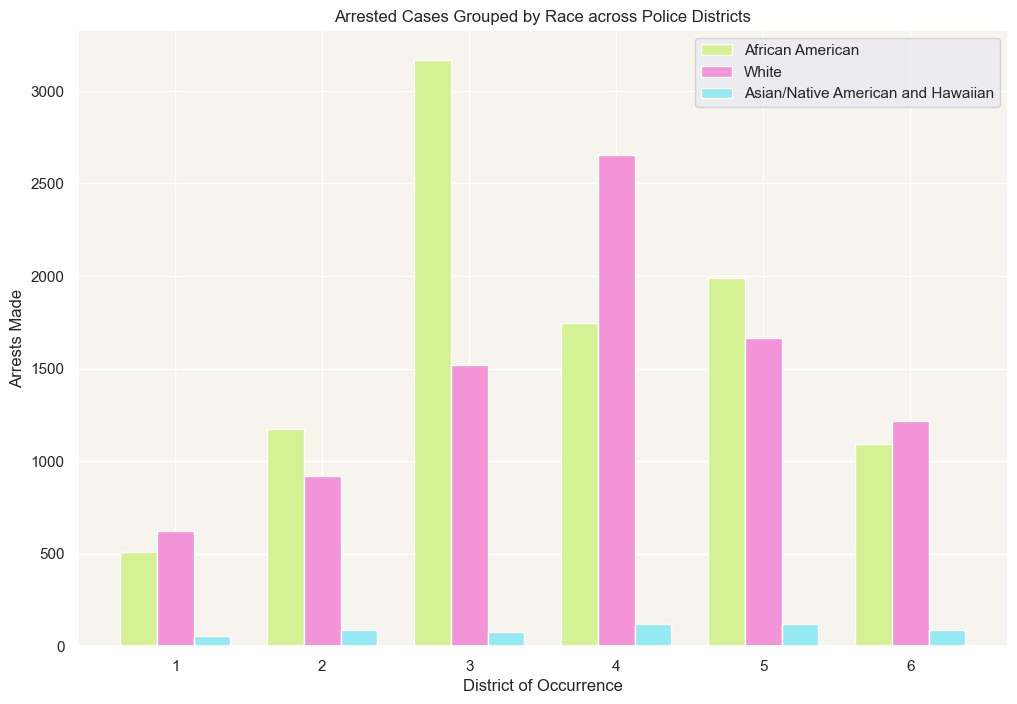

In [55]:
fig, ax = plt.subplots(figsize = (12, 8))

w = .25
index = np.arange(len(df_district))

ax.bar(index - w, df_district['African American'], width = w, label = 'African American', color = '#d4f294')#green
ax.bar(index, df_district['White'], width = w, label = 'White', color = '#f294d7')##pink
ax.bar(index + w, df_district['Asian/Native American and Hawaiian'], width = w, label = 'Asian/Native American and Hawaiian', color = '#94e9f2')##blue
ax.patch.set_facecolor('#f7f4ed')

plt.title('Arrested Cases Grouped by Race across Police Districts')
ax.set_xticks(index)
ax.set_xticklabels(df_district['District'])
ax.set_xlabel('District of Occurrence')
ax.set_ylabel('Arrests Made')


plt.legend()
plt.show()

##not in presentation

In [56]:
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
df['Month'] = df['Event Date/Time'].dt.month
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Month
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,1
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,1
7,Black/African American,Male,40,NON-HISPANIC,4.0,0,4D,PSB,2021-01-01 06:10:00,1
8,White,Male,34,HISPANIC,3.0,0,3D,PSB,2021-01-01 08:55:00,1
9,Black/African American,Male,23,NON-HISPANIC,3.0,0,3D,PSB,2021-01-01 13:54:00,1
...,...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,2024-06-30 11:00:00,6
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,2024-07-01 07:27:00,7
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,6
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,6


In [57]:
district_ct = pd.crosstab(df['Month'], df['District of occurrence'])
ct_16 = district_ct.loc[1:6] / 4
ct_712 = district_ct.loc[7:12] / 3

normalized_district_month = pd.concat([ct_16, ct_712], axis = 0)
normalized_district_month.T

Month,1,2,3,4,5,6,7,8,9,10,11,12
District of occurrence,,,,,,,,,,,,
1.0,26.50,24.25,30.50,27.00,28.00,26.25,26.333333,38.000000,25.000000,25.333333,31.666667,33.000000
2.0,56.25,45.50,50.50,44.25,54.25,48.50,55.333333,58.000000,57.333333,60.000000,47.666667,49.333333
3.0,108.25,118.25,121.50,100.50,125.00,94.00,118.666667,109.333333,100.666667,111.666667,126.666667,130.000000
4.0,96.75,96.25,134.25,118.50,104.50,109.75,95.333333,100.666667,110.000000,103.000000,103.333333,115.000000
5.0,89.75,81.50,88.75,93.50,101.75,87.25,73.333333,91.333333,84.000000,82.333333,100.666667,103.666667
6.0,55.25,51.00,66.50,53.00,58.25,54.00,67.000000,51.666667,56.333333,51.666667,59.666667,62.666667


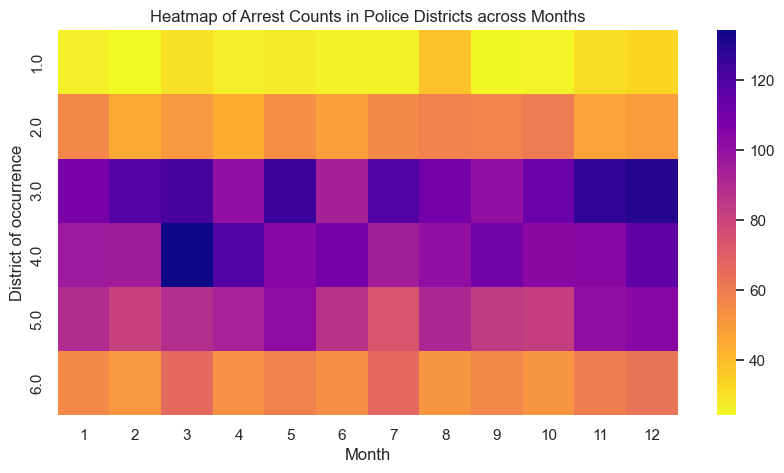

In [58]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(normalized_district_month.T, cmap = 'plasma_r', cbar = True)


#highlight the hottest time of year for arrests and across hottest districts (change based on what you want to see with the commented out code)
# ax.add_patch(plt.Rectangle((0, 2), 6, 3, fill=False, edgecolor = 'green', lw = 3)) #highlight district 3,4,5 for JAN to JUN
# ax.add_patch(plt.Rectangle((0, 2), 12, 2, fill=False, edgecolor = 'green', lw = 3)) #highlight distrct 3 and 4

plt.title('Heatmap of Arrest Counts in Police Districts across Months')
plt.show()